# Draw response matrix $K^{ij}$ and differentially for $l=$ genPt and $j=$recoPt : $K^{ij}_l$

#### Load packages

In [1]:
import train as tn
#reload(tn)

import plotting
#reload(plotting)

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import numpy as np

from pprint import pprint

import pandas as pd

import os
import json
import importlib

import util as ut
reload(ut)

Welcome to ROOTaaS 6.06/05


<module 'util' from 'util.pyc'>

In [2]:
ut.defaultParameters(dataDir="/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data", 
                     classifiers=['class','recoPt','recoNjets2p5'],
                          load = True,
                     inputName = '3clfs_angular',#"2clfs",
#                       outName = "3clfs_GenIsoAdded_out",
                        outDir = './classifiers',
                    inputDir = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/classifiers',
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                     #             'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 },
                     dataFiles=[(0,'output_GluGluHToGG_M125_IA.root'),                   
                                (1,'output_ttHToGG_M125_IA.root'),                     
                                (2,'output_VBFHToGG_M125_IA.root'),                            
                                (3,'output_VHToGG_M125_IA.root'),
                               ]
                    )


In [3]:
ut.setParams()
# manual fix in order that the json file doesn't overwrite inputDir
#ut.params['inputDir'] = "/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/classifiers"

# manual fix as rapidities are not yet included in n-tuples

ut.params['genBranches'] = ['genPt', 'genRapidity', 'genJet2p5Pt0', 'genJet2p5Pt1', 'genJet2p5Pt2', 
                            'genJet2p5Pt3', 'genJet2p5Pt4', 'genJet2p5Pt5', 'genJet2p5Rapidity0', 
                            'genJet2p5Rapidity1', 'genJet2p5Rapidity2', 'genJet2p5Rapidity3', 
                            'genJet2p5Rapidity4', 'genJet2p5Rapidity5', 'weight', 'genNjets2p5', 
                            'genLeadGenIso', 'genSubleadGenIso', 
                            'absCosDeltaAlpha01', 'absCosDeltaAlpha02',
                            'absCosDeltaAlpha03', 'absCosDeltaAlpha04', 'absCosDeltaAlpha05', 
                            'absCosDeltaAlpha12', 'absCosDeltaAlpha13', 'absCosDeltaAlpha14', 
                            'absCosDeltaAlpha15', 'absCosDeltaAlpha23', 'absCosDeltaAlpha24', 
                            'absCosDeltaAlpha25', 'absCosDeltaAlpha34', 'absCosDeltaAlpha35', 
                            'absCosDeltaAlpha45', 'absCosDeltaPhi01', 'absCosDeltaPhi02', 
                            'absCosDeltaPhi03', 'absCosDeltaPhi04', 'absCosDeltaPhi05', 
                            'absCosDeltaPhi12', 'absCosDeltaPhi13', 'absCosDeltaPhi14', 
                            'absCosDeltaPhi15', 'absCosDeltaPhi23', 'absCosDeltaPhi24', 
                            'absCosDeltaPhi25', 'absCosDeltaPhi34', 'absCosDeltaPhi35', 'absCosDeltaPhi45'
]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_125_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_125_13TeV'


#ut.params['recoBranches'] = ['recoPt','recoRapidity','recoNjets2p5']

entered config files named my_train_config
hi
None


#### Load the Classifier trained with SM

In [4]:
%time FitterSM = ut.loadOrMake()

Load object with the name 3clfs_angular and the following paramters 
{'classifiers': ['class', 'recoPt', 'recoNjets2p5'],
 'clean': [],
 'dataDir': '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data',
 'dataFiles': [(0, 'output_GluGluHToGG_M125_IA.root'),
               (1, 'output_ttHToGG_M125_IA.root'),
               (2, 'output_VBFHToGG_M125_IA.root'),
               (3, 'output_VHToGG_M125_IA.root')],
 'dataFname': 'output_InsideAcceptance_125.root',
 'defineBins': {'recoPt': {'boundaries': [0.0,
                                          15.0,
                                          30.0,
                                          45.0,
                                          85.0,
                                          125.0,
                                          200.0,
                                          350.0,
                                          10000.0],
                           'overflow': False}},
 'forceMake': False,
 'genBranch

#### Load all the BSM files from scratch

In [5]:
ut.defaultParameters(dataDir="/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data", 
                     classifiers=['class','recoPt','recoNjets2p5'],
                    defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                                  'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                    #              #'genPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
                    #              #'genNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
                                 }
                    )

ut.params['load'] = False


ut.params['genBranches'] = ['genPt', 'genRapidity', 'genJet2p5Pt0', 'genJet2p5Pt1', 'genJet2p5Pt2', 
                            'genJet2p5Pt3', 'genJet2p5Pt4', 'genJet2p5Pt5', 'genJet2p5Rapidity0', 
                            'genJet2p5Rapidity1', 'genJet2p5Rapidity2', 'genJet2p5Rapidity3', 
                            'genJet2p5Rapidity4', 'genJet2p5Rapidity5', 'weight', 'genNjets2p5', 
                            'genLeadGenIso', 'genSubleadGenIso', 
                            'absCosDeltaAlpha01', 'absCosDeltaAlpha02',
                            'absCosDeltaAlpha03', 'absCosDeltaAlpha04', 'absCosDeltaAlpha05', 
                            'absCosDeltaAlpha12', 'absCosDeltaAlpha13', 'absCosDeltaAlpha14', 
                            'absCosDeltaAlpha15', 'absCosDeltaAlpha23', 'absCosDeltaAlpha24', 
                            'absCosDeltaAlpha25', 'absCosDeltaAlpha34', 'absCosDeltaAlpha35', 
                            'absCosDeltaAlpha45', 'absCosDeltaPhi01', 'absCosDeltaPhi02', 
                            'absCosDeltaPhi03', 'absCosDeltaPhi04', 'absCosDeltaPhi05', 
                            'absCosDeltaPhi12', 'absCosDeltaPhi13', 'absCosDeltaPhi14', 
                            'absCosDeltaPhi15', 'absCosDeltaPhi23', 'absCosDeltaPhi24', 
                            'absCosDeltaPhi25', 'absCosDeltaPhi34', 'absCosDeltaPhi35', 'absCosDeltaPhi45'
] 
ut.params['recoBranches'] = ['recoPt','recoRapidity','recoNjets2p5']


ut.params['dataFiles'] = [(4,'output_SMS-T2bH_mSbottom-350_mLSP-150_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_mSb350_mLSP150_13TeV'


effFitter_BSM_1 = ut.loadFromScratch()


ut.params['dataFiles'] = [(5,'output_SMS-T2bH_mSbottom-450_mLSP-200_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_mSb450_mLSP200_13TeV'

effFitter_BSM_2 = ut.loadFromScratch()

ut.params['dataFiles'] = [(6,'output_SMS-T2bH_mSbottom-500_mLSP-1_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')]
ut.params['genpfx'] = 'genDiphotonDumper/trees/InsideAcceptance_mSb500_mLSP1_13TeV'
ut.params['pfx'] = 'tagsDumper/trees/InsideAcceptance_mSb500_mLSP1_13TeV'

effFitter_BSM_3 = ut.loadFromScratch()
    

{'classifiers': ['class', 'recoPt', 'recoNjets2p5'],
 'clean': [],
 'dataDir': '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/data',
 'dataFiles': [(4,
                'output_SMS-T2bH_mSbottom-350_mLSP-150_TuneCUETP8M1_13TeV-madgraphMLM-pythia8.root')],
 'dataFname': 'output_InsideAcceptance_125.root',
 'defineBins': {'recoNjets2p5': {'boundaries': [-0.5,
                                                0.5,
                                                1.5,
                                                2.5,
                                                3.5,
                                                100.0],
                                 'overflow': False},
                'recoPt': {'boundaries': [0.0,
                                          15.0,
                                          30.0,
                                          45.0,
                                          85.0,
                                          125.0,
           

In [6]:
df_BSM1 = effFitter_BSM_1.df
df_BSM2 = effFitter_BSM_2.df
df_BSM3 = effFitter_BSM_3.df

df_BSM = pd.concat([df_BSM1,df_BSM2,df_BSM3],ignore_index=True)

#df_BSM['proc']

In [7]:
"""
Change type from categorical to float
"""
df_BSM['recoPtBin'] = df_BSM['recoPtBin'].astype=('float')
df_BSM['recoNjets2p5Bin'] = df_BSM['recoNjets2p5Bin'].astype=('float')
#df = pd.DataFrame(a, dtype='float')

In [8]:
FitterSM.df = FitterSM.df.append(df_BSM,ignore_index=False)

In [9]:
prob_names = []
for col in FitterSM.df.columns :
    if '_prob_' in col :
        prob_names.append(col)

In [10]:
print prob_names

['class_prob_0', 'class_prob_1', 'class_prob_2', 'class_prob_3', 'recoNjets2p5Cat_prob_0', 'recoNjets2p5Cat_prob_1', 'recoNjets2p5Cat_prob_10', 'recoNjets2p5Cat_prob_11', 'recoNjets2p5Cat_prob_12', 'recoNjets2p5Cat_prob_13', 'recoNjets2p5Cat_prob_14', 'recoNjets2p5Cat_prob_15', 'recoNjets2p5Cat_prob_2', 'recoNjets2p5Cat_prob_3', 'recoNjets2p5Cat_prob_4', 'recoNjets2p5Cat_prob_5', 'recoNjets2p5Cat_prob_6', 'recoNjets2p5Cat_prob_7', 'recoNjets2p5Cat_prob_8', 'recoNjets2p5Cat_prob_9', 'recoPtCat_prob_0', 'recoPtCat_prob_1', 'recoPtCat_prob_10', 'recoPtCat_prob_11', 'recoPtCat_prob_12', 'recoPtCat_prob_13', 'recoPtCat_prob_14', 'recoPtCat_prob_15', 'recoPtCat_prob_16', 'recoPtCat_prob_17', 'recoPtCat_prob_18', 'recoPtCat_prob_19', 'recoPtCat_prob_2', 'recoPtCat_prob_20', 'recoPtCat_prob_21', 'recoPtCat_prob_22', 'recoPtCat_prob_23', 'recoPtCat_prob_24', 'recoPtCat_prob_3', 'recoPtCat_prob_4', 'recoPtCat_prob_5', 'recoPtCat_prob_6', 'recoPtCat_prob_7', 'recoPtCat_prob_8', 'recoPtCat_prob_9'

In [11]:
df = FitterSM.df

#### delete probabilities in order that they are re-evaluated also on the BSM

In [12]:
for name in prob_names :
    del FitterSM.df[name]

In [13]:
ut.runEvaluation(FitterSM)

['class', 'recoPt', 'recoNjets2p5']
class
class
class_prob_0
Index([u'absCosDeltaAlpha01', u'absCosDeltaAlpha02', u'absCosDeltaAlpha03',
       u'absCosDeltaAlpha04', u'absCosDeltaAlpha05', u'absCosDeltaAlpha12',
       u'absCosDeltaAlpha13', u'absCosDeltaAlpha14', u'absCosDeltaAlpha15',
       u'absCosDeltaAlpha23', u'absCosDeltaAlpha24', u'absCosDeltaAlpha25',
       u'absCosDeltaAlpha34', u'absCosDeltaAlpha35', u'absCosDeltaAlpha45',
       u'absCosDeltaPhi01', u'absCosDeltaPhi02', u'absCosDeltaPhi03',
       u'absCosDeltaPhi04', u'absCosDeltaPhi05', u'absCosDeltaPhi12',
       u'absCosDeltaPhi13', u'absCosDeltaPhi14', u'absCosDeltaPhi15',
       u'absCosDeltaPhi23', u'absCosDeltaPhi24', u'absCosDeltaPhi25',
       u'absCosDeltaPhi34', u'absCosDeltaPhi35', u'absCosDeltaPhi45',
       u'absGenJet2p5Rapidity0', u'absGenJet2p5Rapidity1',
       u'absGenJet2p5Rapidity2', u'absGenJet2p5Rapidity3',
       u'absGenJet2p5Rapidity4', u'absGenJet2p5Rapidity5', u'absGenRapidity',
       u'absw

# Draw Histograms

In [14]:
def GetProdProcName (n) :
    if (n==0) :
        return 'ggF'
    if (n==1) :
        return 'ttH'
    if (n==2) :
        return 'VBF'
    if (n==3) :
        return 'VH'
    if (n==4) :
        return 'BSM1'
    if (n==5) :
        return 'BSM2'
    if (n==6) :
        return 'BSM3'

In [15]:
bins_dict = { 'genPt'        : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.],overflow=True),#overflow=True is default 
             'genNjets2p5'        : dict(boundaries=[-0.5, 0.5, 1.5, 2.5, 3.5]), 
             }

ut.runDefineBins(FitterSM,bins_dict)

genNjets2p5
<type 'str'>
genPt
<type 'str'>


In [16]:
df = FitterSM.df

In [17]:
first_train_evt = int(round(FitterSM.df.index.size*(1.-FitterSM.split_frac)))
BSM_mask = df['proc'].isin([4,5,6])
#take the test sample \
print first_train_evt
df = FitterSM.df[:first_train_evt].append(FitterSM.df[BSM_mask],
                                          ignore_index=True)

365519


In [18]:
class_list = ['class','recoPt','recoNjets2p5']
#class_list = ['class']#,'recoNjets2p5']

save_directory = './plots/N_reco_std_analysis/VBF'
save_directory =None
print('save directory:',save_directory)


('save directory:', None)


In [19]:
process_OfInterest = [4]#,5,6]

In [20]:
l = [GetProdProcName(n=s) for s in process_OfInterest][0]
save_directory = './plots/N_reco_more_angular_vars/'+l
save_directory =None
print l
print('save directory:',save_directory)

BSM1
('save directory:', None)


There are 4 features of type class
class_BSM1PtBin0
['BSM1']

      details:
BSM1: 
$m_\tilde{b}=350 \, \mathrm{ GeV}$ 
$m_\mathrm{LSP}=150 \, \mathrm{ GeV}$ 
There are 25 features of type recoPtCat
recoPt_BSM1PtBin0
['BSM1']

      details:
BSM1: 
$m_\tilde{b}=350 \, \mathrm{ GeV}$ 
$m_\mathrm{LSP}=150 \, \mathrm{ GeV}$ 
There are 16 features of type recoNjets2p5Cat
recoNjets2p5_BSM1PtBin0
['BSM1']

      details:
BSM1: 
$m_\tilde{b}=350 \, \mathrm{ GeV}$ 
$m_\mathrm{LSP}=150 \, \mathrm{ GeV}$ 


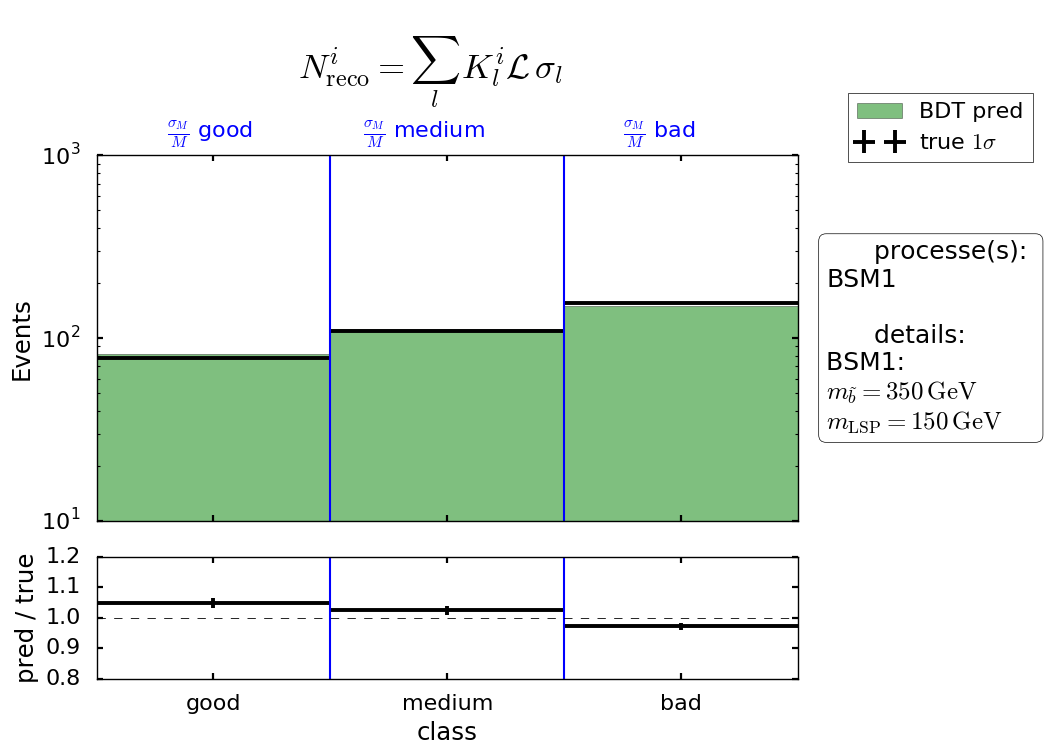

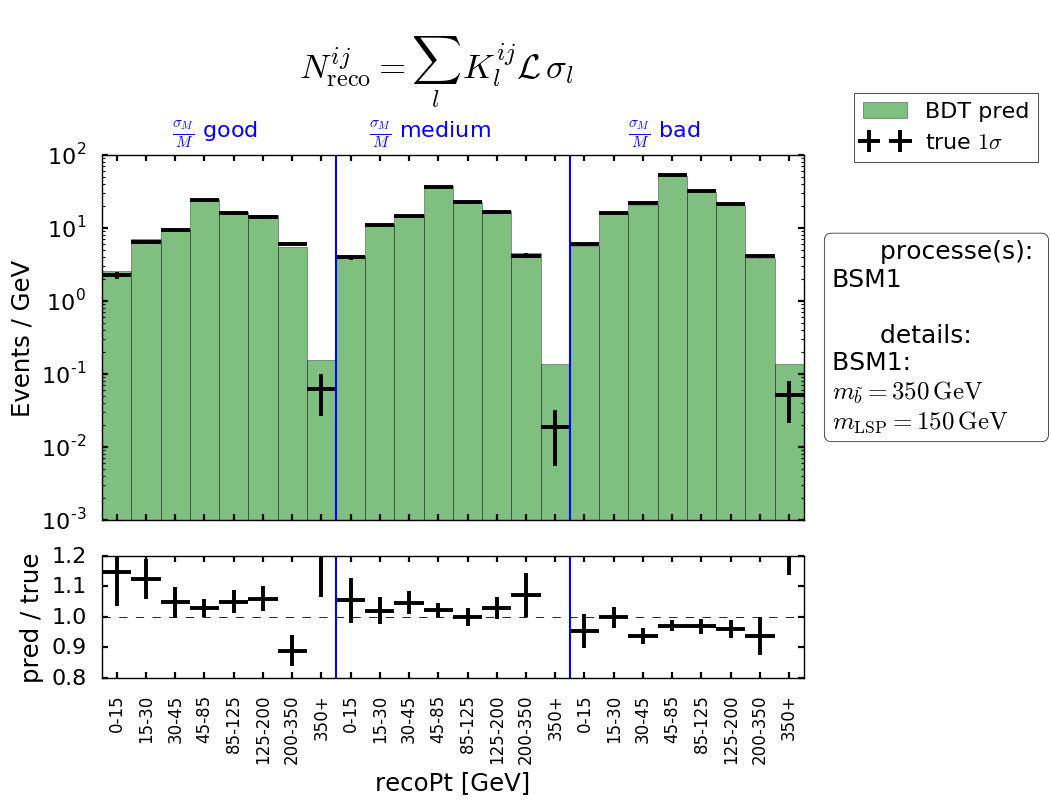

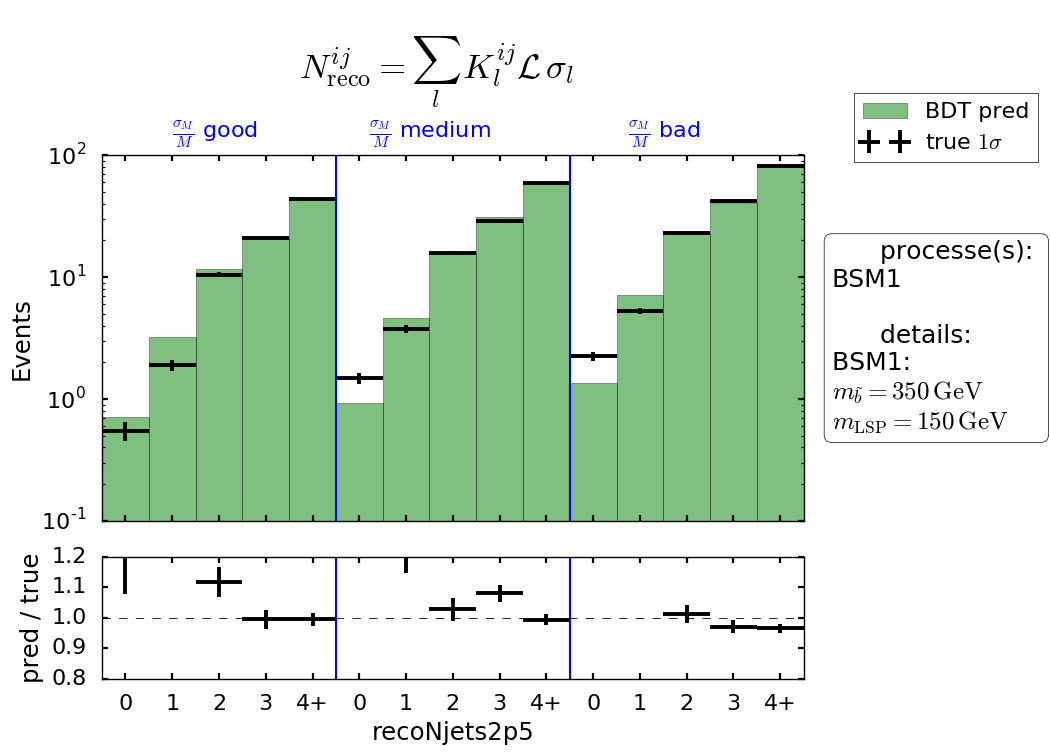

In [82]:
reload(plotting)
proc_mask = df['proc'].isin(process_OfInterest)
K_matrix=[]
Pt_bin=0
for cl in class_list :
    if ('class' in cl) :
        pl_title = r'$N^{i}_{\mathrm{reco}} = \sum_{l} \, K^{i}_l \mathcal{L} \, \sigma_l$'
    else :
        pl_title = r'$N^{ij}_{\mathrm{reco}} = \sum_{l} \, K^{ij}_l \mathcal{L} \, \sigma_l$'
    
    plotting.draw_data_mc(
                df=df[proc_mask],#&(df['absGenRapidityBin']==Rap_bin)],
                               column = cl, 
                              logy=True, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              plot_title=pl_title,
                              title=cl+'_'+GetProdProcName(process_OfInterest[0])+'PtBin'+str(Pt_bin),
                              absolute=False,
                            model_processes = [GetProdProcName(n=s) for s in process_OfInterest]
                             )
   

# Differential in gen-level bins

In [39]:
process_OfInterest = [4]#,5,6]

In [40]:
l = [GetProdProcName(n=s) for s in process_OfInterest][0]
save_directory = './plots/N_reco_more_angular_vars/'+l+'_diffgenNjets'
save_directory =None
print l
print('save directory:',save_directory)

BSM1
('save directory:', None)


('Njets_bin ', 0)
There are 16 features of type recoNjets2p5Cat
recoNjets2p5_ggFNjetsBin0
('Njets_bin ', 1)
There are 16 features of type recoNjets2p5Cat
recoNjets2p5_ggFNjetsBin1
('Njets_bin ', 2)
There are 16 features of type recoNjets2p5Cat
recoNjets2p5_ggFNjetsBin2
('Njets_bin ', 3)
There are 16 features of type recoNjets2p5Cat
recoNjets2p5_ggFNjetsBin3
('Njets_bin ', 4)
There are 16 features of type recoNjets2p5Cat
recoNjets2p5_ggFNjetsBin4


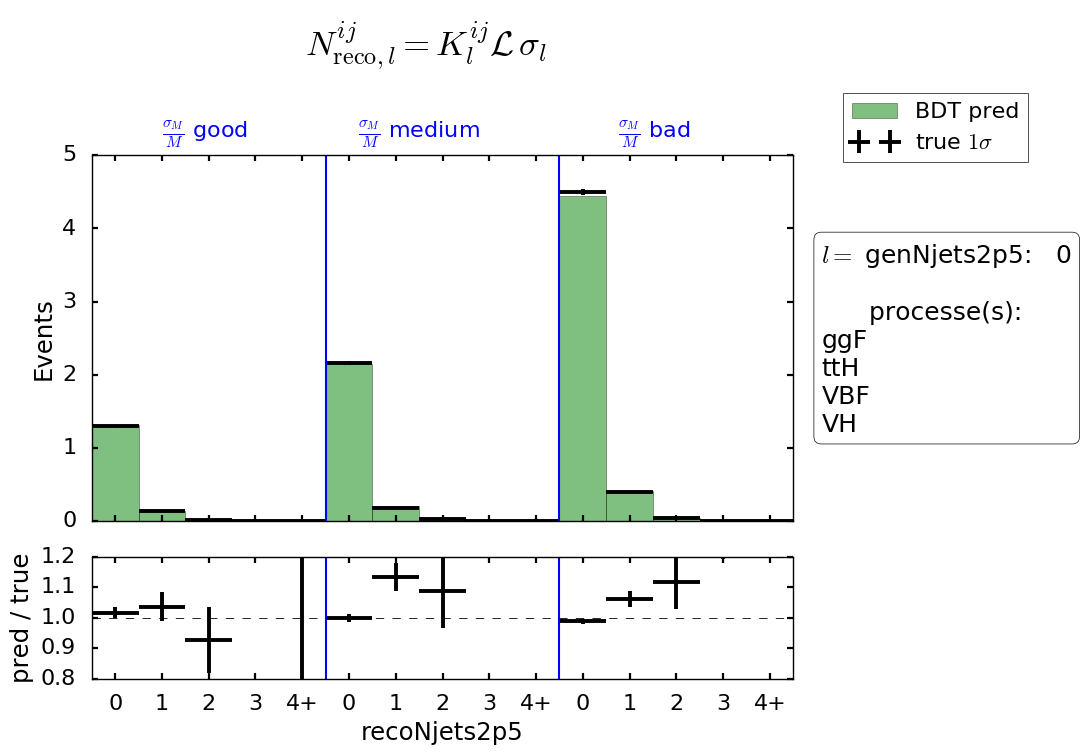

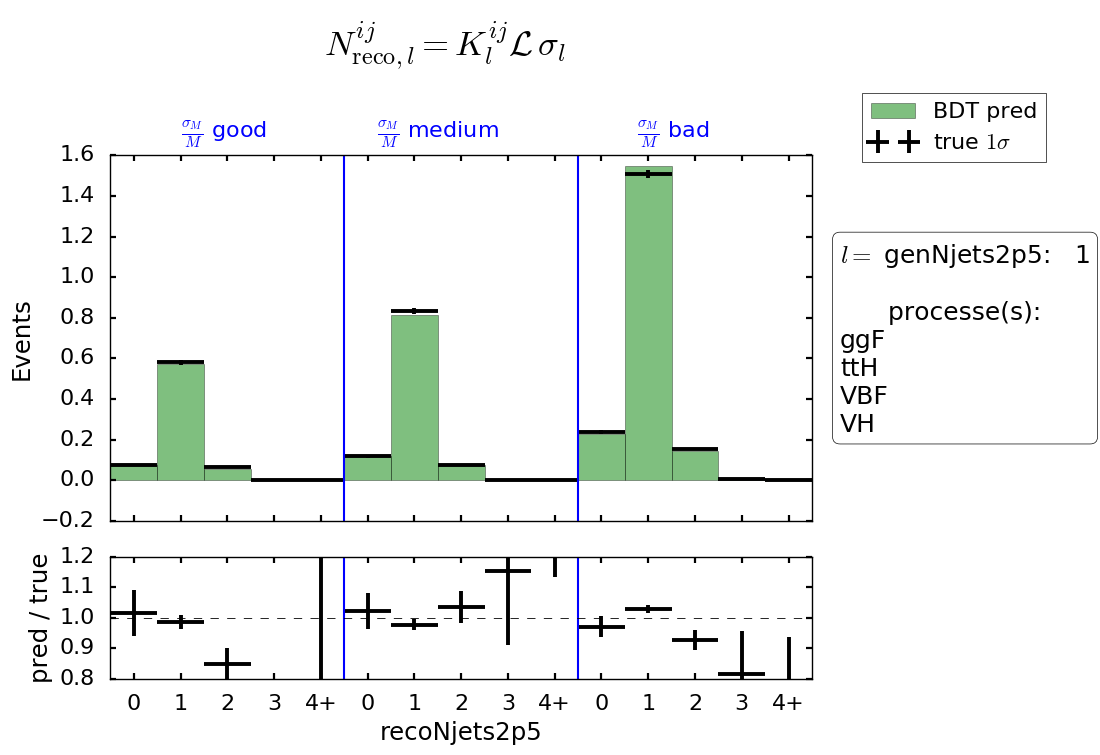

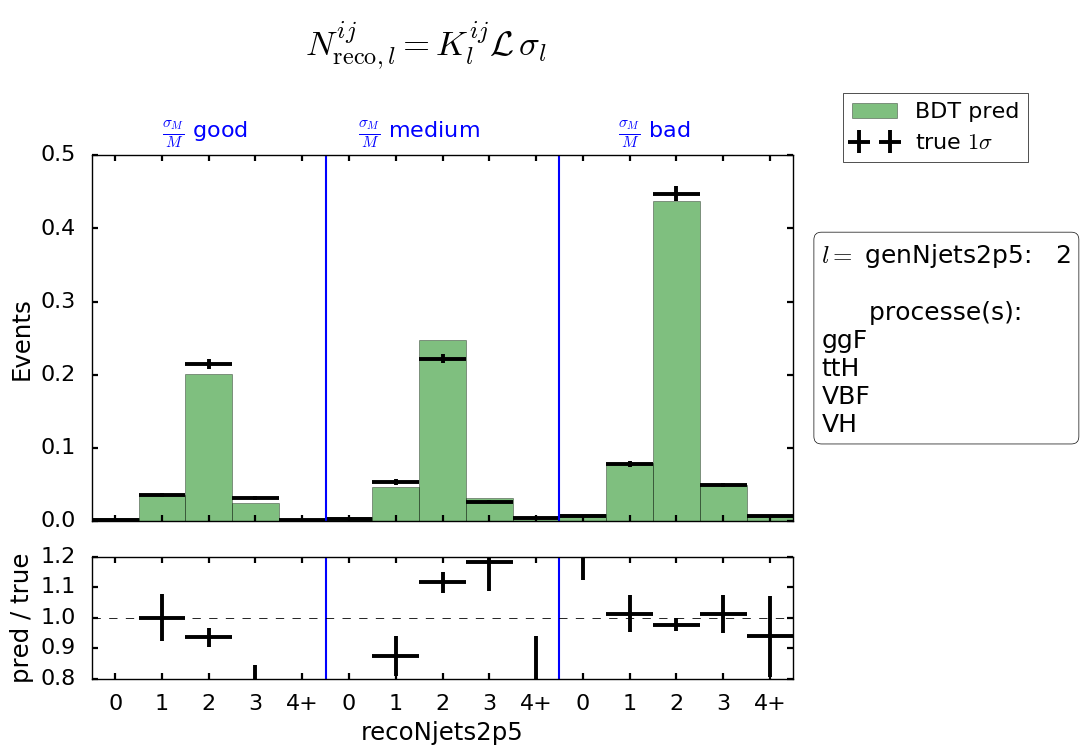

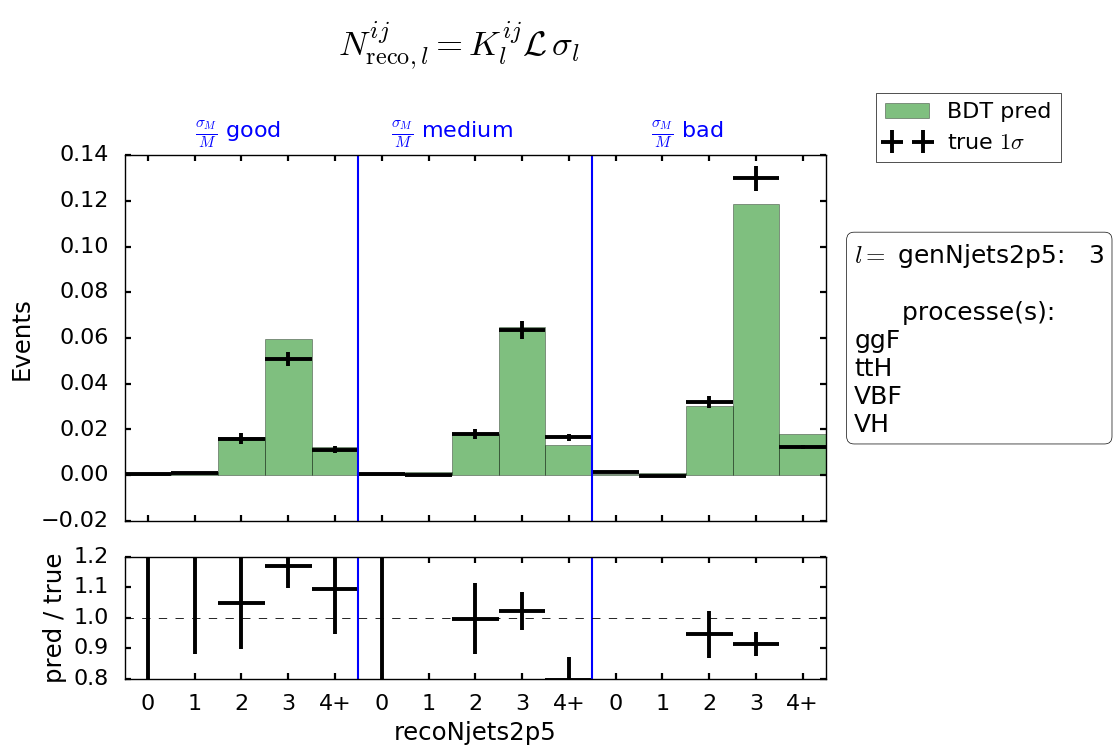

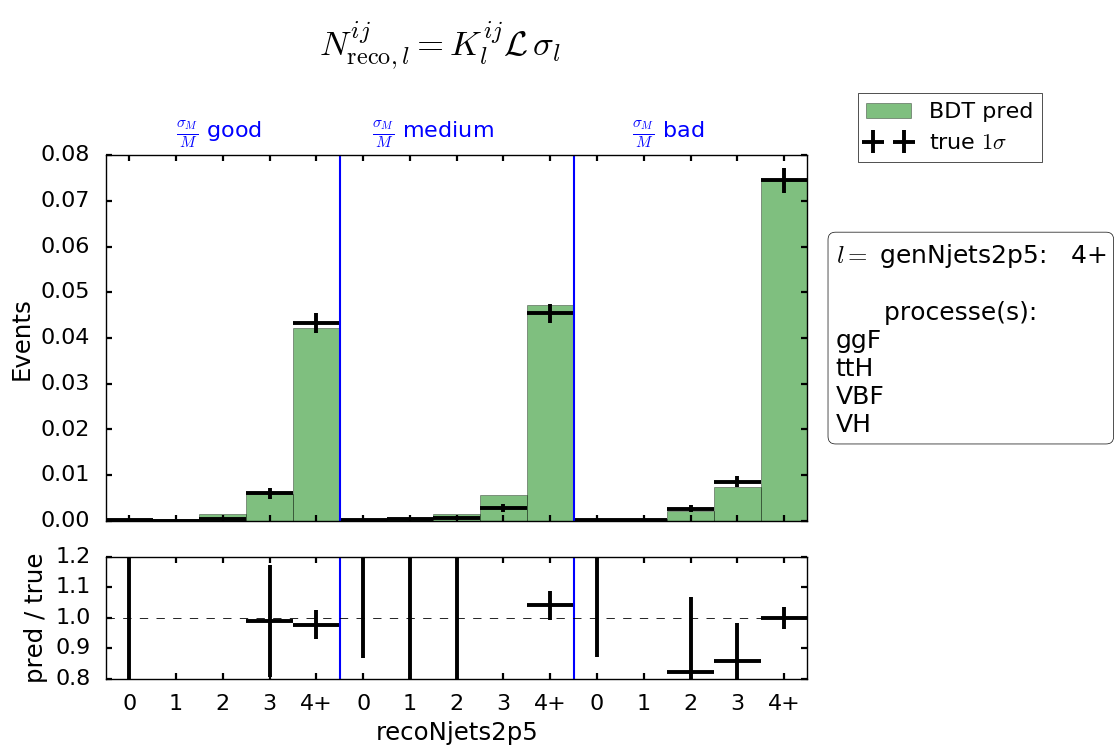

In [32]:
reload(plotting)
proc_mask = df['proc'].isin(process_OfInterest)
N_reco_pred_matrix=[]
N_reco_true_matrix=[]
cl = 'recoNjets2p5'
for Njets_bin in xrange(df['genNjets2p5Bin'].min(),df['genNjets2p5Bin'].max()+1,1) :
    print ('Njets_bin ',Njets_bin)
    Njets_mask = df['genNjets2p5Bin']==Njets_bin
    pl_title = r'$N^{ij}_{\mathrm{reco},l} = K^{ij}_l \mathcal{L} \, \sigma_l$'

    N_ij_l_pred,N_ij_l_true = plotting.draw_data_mc(
            df=df[proc_mask&Njets_mask],#&(df['absGenRapidityBin']==Rap_bin)],
                           column = cl, 
                          logy=False, 
                          ratio=True,
                          var=[cl,''],
                          first=1,
                   savepath=save_directory,
                          plot_title=pl_title,
                          title=cl+'_'+GetProdProcName(process_OfInterest[0])+'NjetsBin'+str(Njets_bin),
                          absolute=False,
                        model_processes = [GetProdProcName(n=s) for s in process_OfInterest],
                    DiffGenVariable=True
                         )
    N_reco_pred_matrix.append(N_ij_l_pred)
    N_reco_true_matrix.append(N_ij_l_true)
#change list to 2D array and transpose to have the right 
#dimensions (3J+1,L)
N_reco_pred_matrix = np.array(N_reco_pred_matrix).T
N_reco_true_matrix = np.array(N_reco_true_matrix).T
        

In [33]:
path = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/differential_recoMatrices/'
name = 'SM'

np.save(path+'N_reco_pred_genNjets_'+name,N_reco_pred_matrix)
np.save(path+'N_reco_true_genNjets_'+name,N_reco_true_matrix)


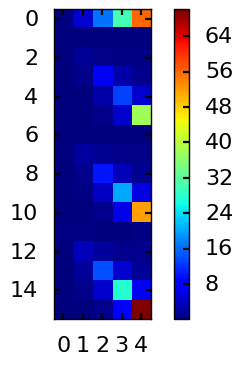

In [24]:
plt.imshow(N_reco_matrix,interpolation='nearest')
plt.colorbar()

## repeat for differential genPt

In [41]:
l = [GetProdProcName(n=s) for s in process_OfInterest][0]
save_directory = './plots/N_reco_more_angular_vars/'+l+'_diffgenPt'
save_directory =None
print l
print('save directory:',save_directory)

BSM1
('save directory:', None)


('Pt bin ', 0)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin0
('Pt bin ', 1)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin1
('Pt bin ', 2)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin2
('Pt bin ', 3)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin3
('Pt bin ', 4)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin4
('Pt bin ', 5)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin5
('Pt bin ', 6)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin6
('Pt bin ', 7)
There are 25 features of type recoPtCat
recoPt_BSM1PtBin7


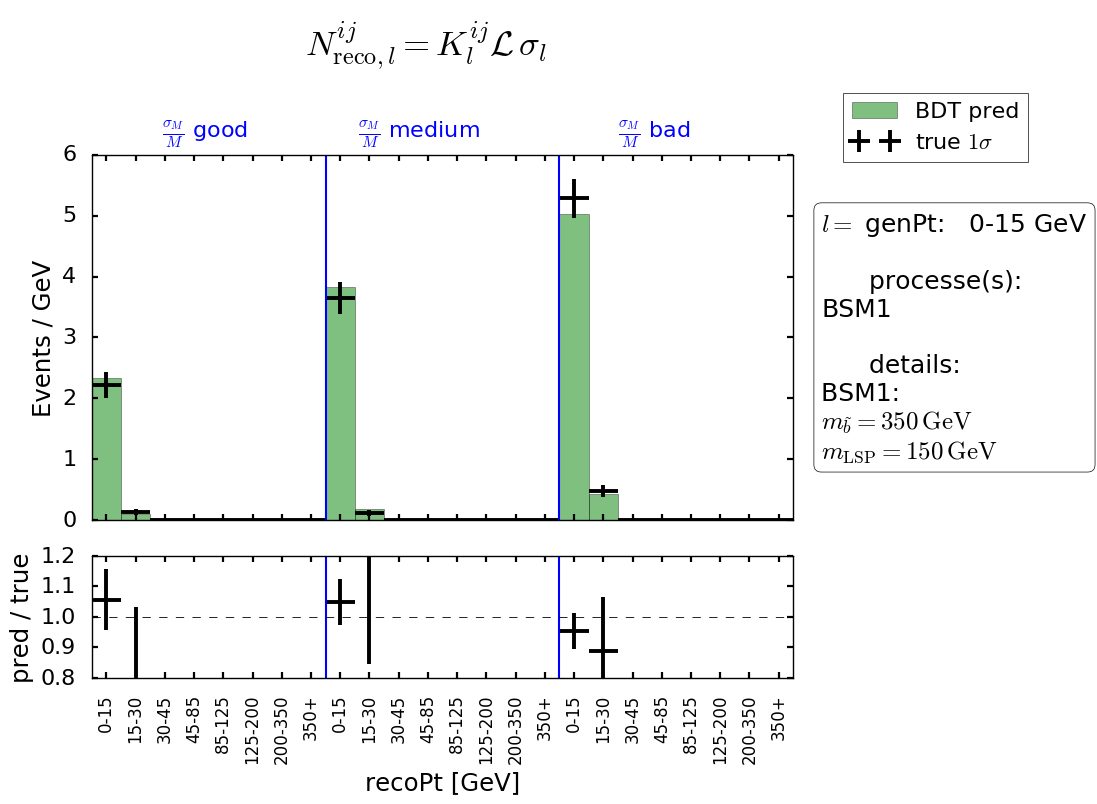

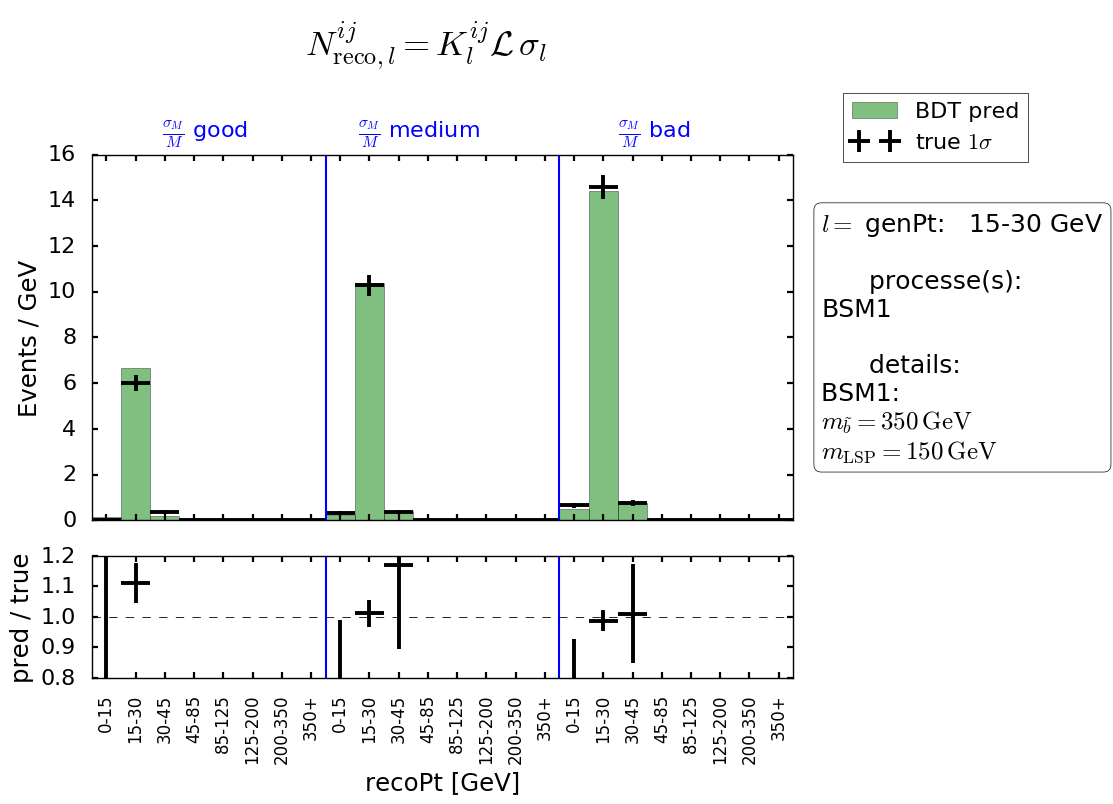

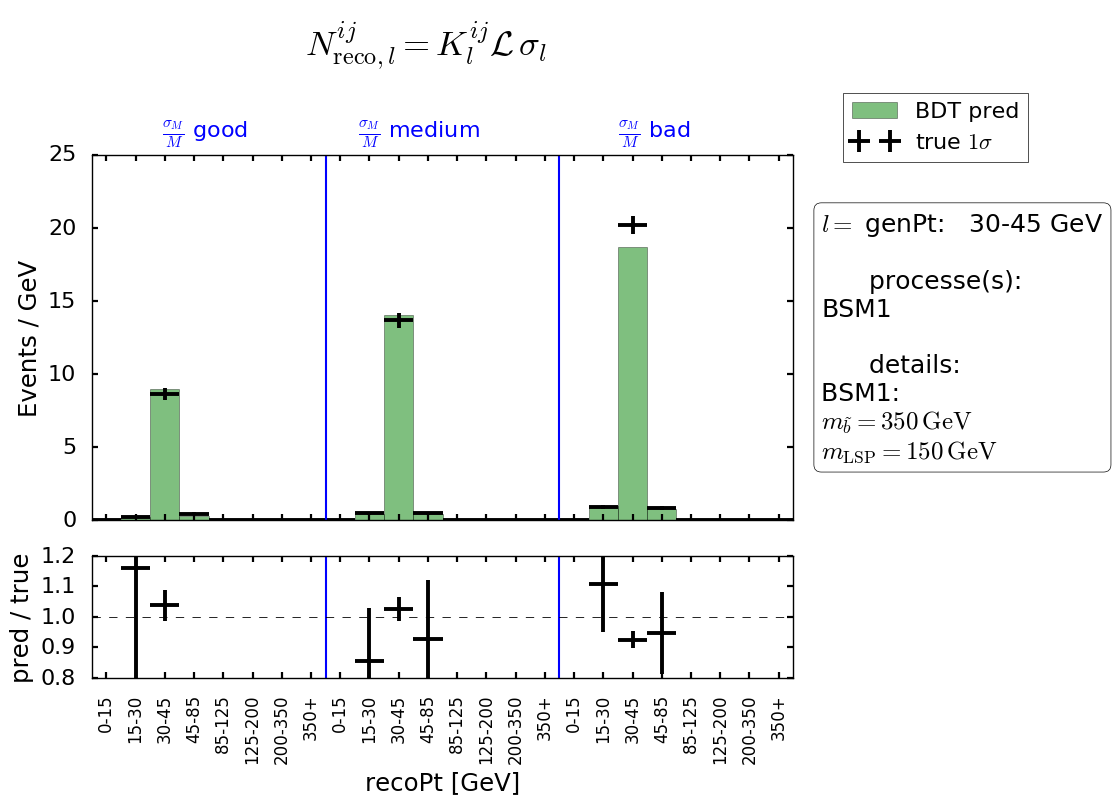

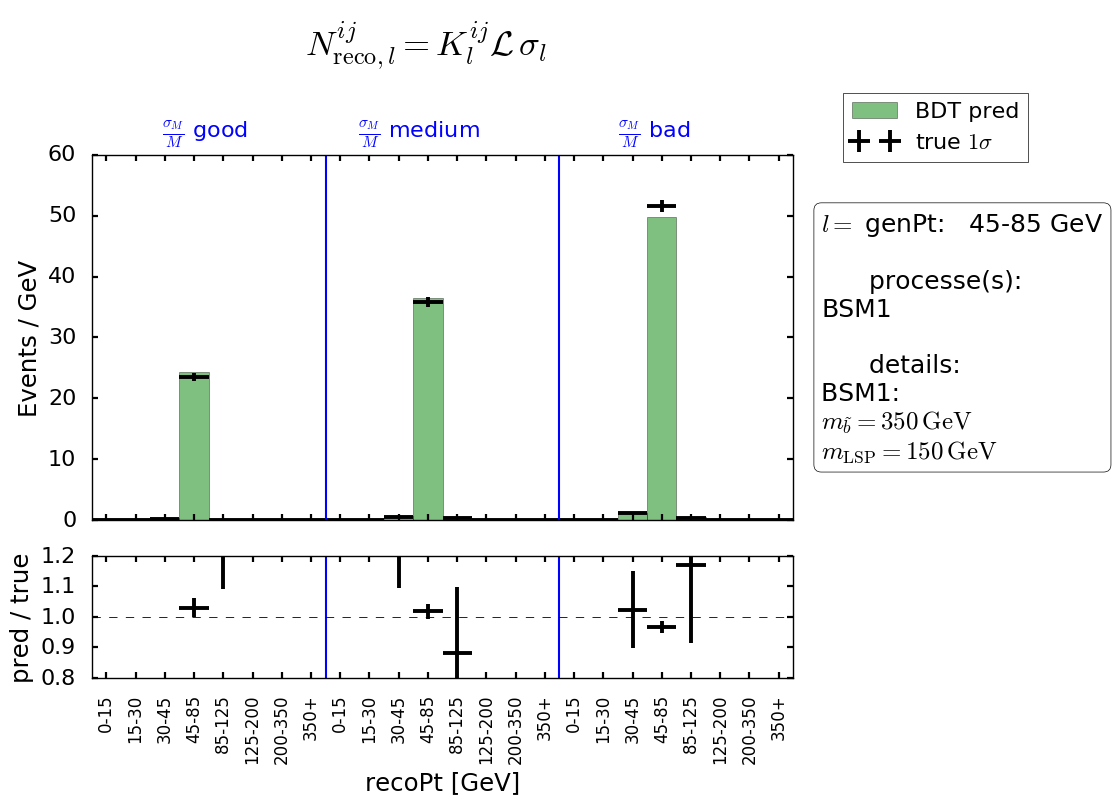

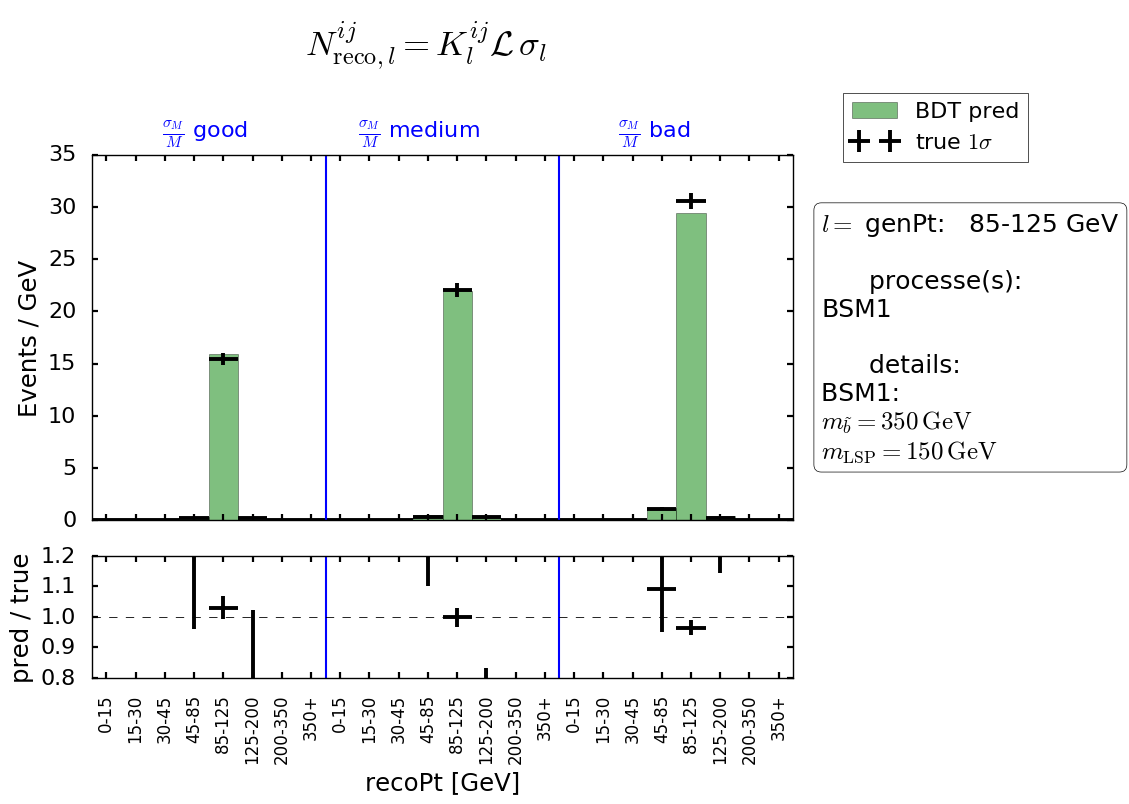

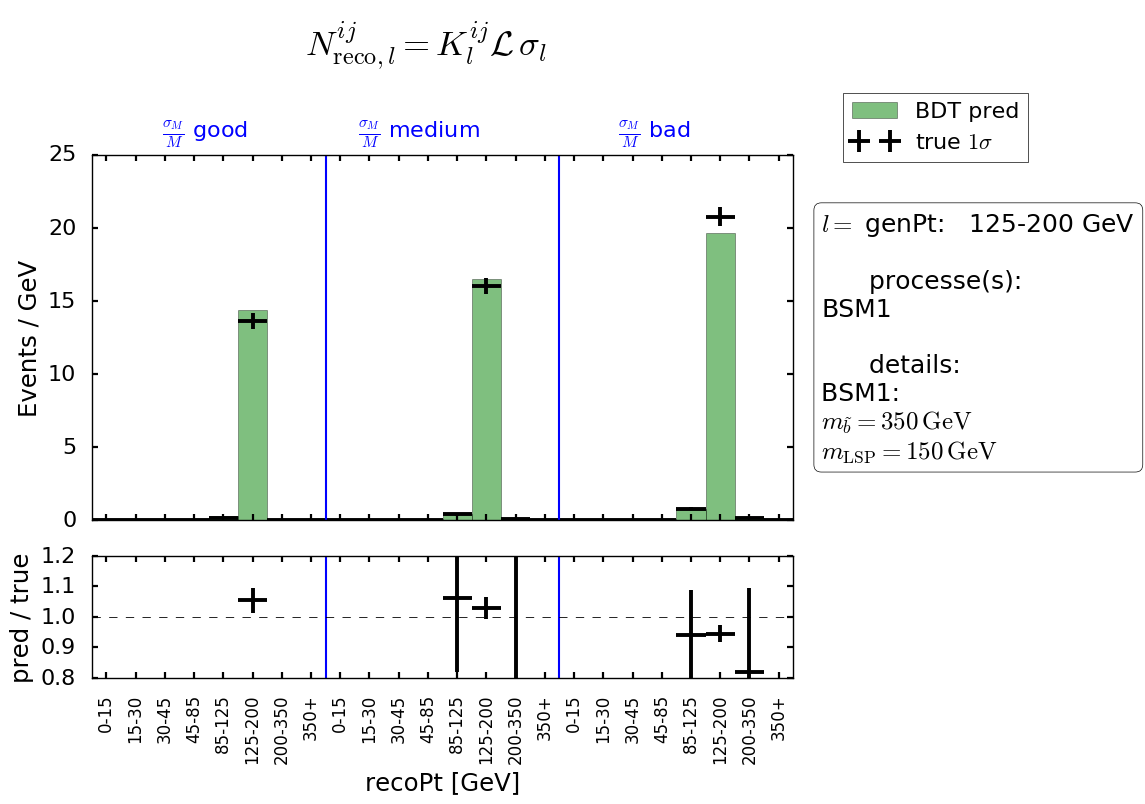

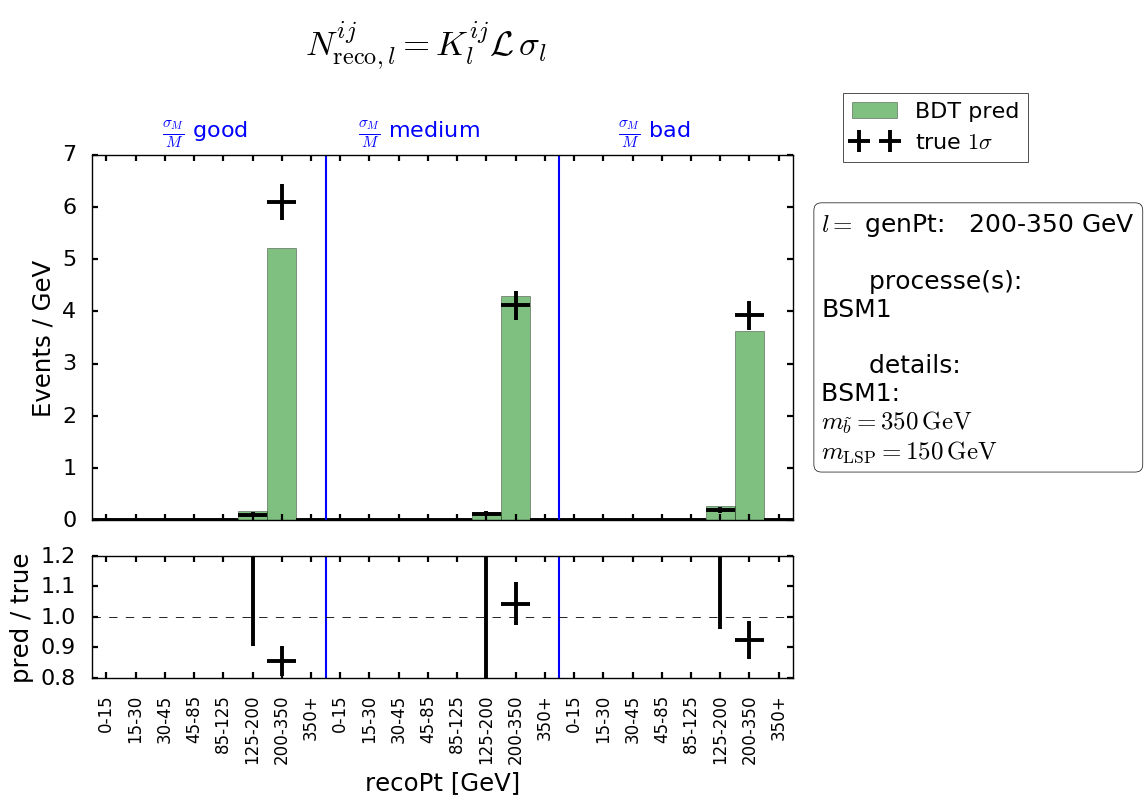

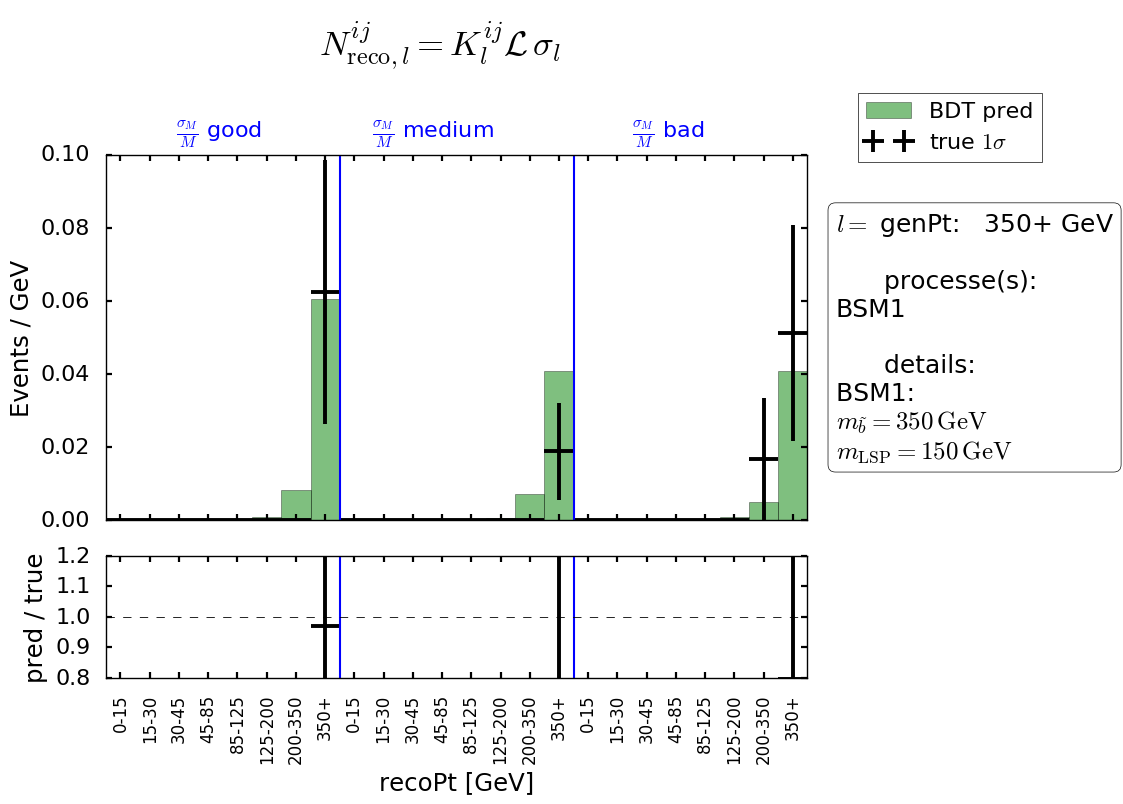

In [42]:
reload(plotting)
proc_mask = df['proc'].isin(process_OfInterest)
N_reco_pred_matrix=[]
N_reco_true_matrix=[]

cl = 'recoPt'


for Pt_bin in xrange(df['genPtBin'].min(),df['genPtBin'].max()+1,1) :
    print ('Pt bin ',Pt_bin)
    Pt_mask = df['genPtBin']==Pt_bin
    pl_title = r'$N^{ij}_{\mathrm{reco},l} = K^{ij}_l \mathcal{L} \, \sigma_l$'

    N_ij_l_pred,N_ij_l_true = plotting.draw_data_mc(
                        df=df[proc_mask&Pt_mask],#&(df['absGenRapidityBin']==Rap_bin)],
                           column = cl, 
                          logy=False, 
                          ratio=True,
                          var=[cl,''],
                          first=1,
                   savepath=save_directory,
                          plot_title=pl_title,
                          title=cl+'_'+GetProdProcName(process_OfInterest[0])+'PtBin'+str(Pt_bin),
                          absolute=False,
                        model_processes = [GetProdProcName(n=s) for s in process_OfInterest],
                    DiffGenVariable=True
                         )
    N_reco_pred_matrix.append(N_ij_l_pred)
    N_reco_true_matrix.append(N_ij_l_true)
#change list to 2D array and transpose to have the right 
#dimensions (3J+1,L)
N_reco_pred_matrix = np.array(N_reco_pred_matrix).T
N_reco_true_matrix = np.array(N_reco_true_matrix).T
        
    
    
    

In [43]:
path = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/MoriondAnalysis/differential_recoMatrices/'
name = 'BSM1'

np.save(path+'N_reco_pred_genPt_'+name,N_reco_pred_matrix)
np.save(path+'N_reco_true_genPt_'+name,N_reco_true_matrix)


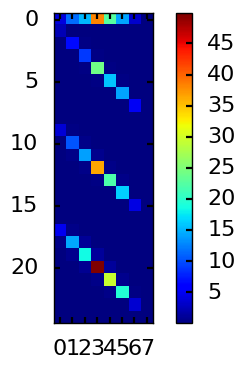

In [89]:
plt.imshow(N_reco_matrix,interpolation='nearest')
plt.colorbar()

# Inspect Islation of the photons

In [57]:
genPtBIN = 0


genIso_BSM1 = df[(df['proc']==4)&(df['genPtBin']==genPtBIN)]
genSubIso_BSM1 = df[(df['proc']==4)&(df['genPtBin']==genPtBIN)]


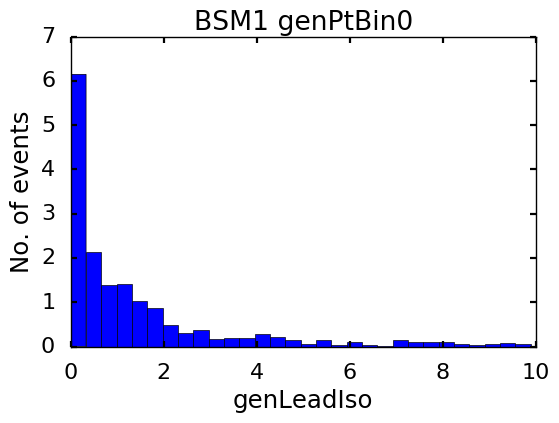

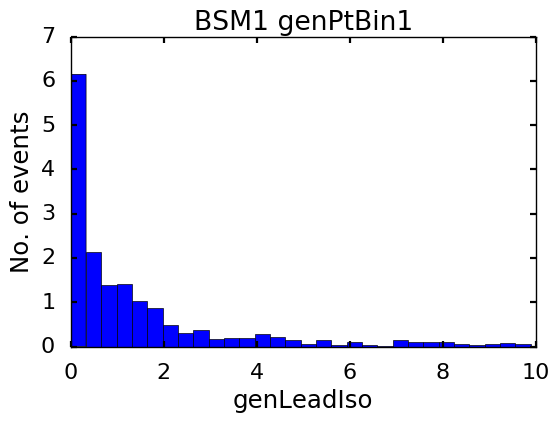

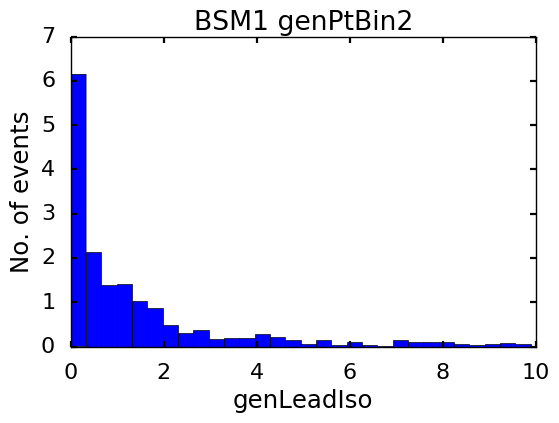

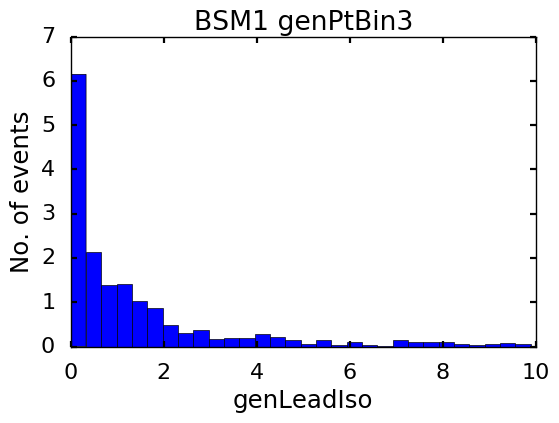

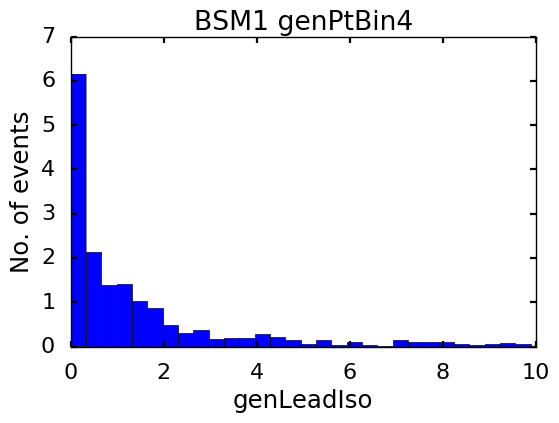

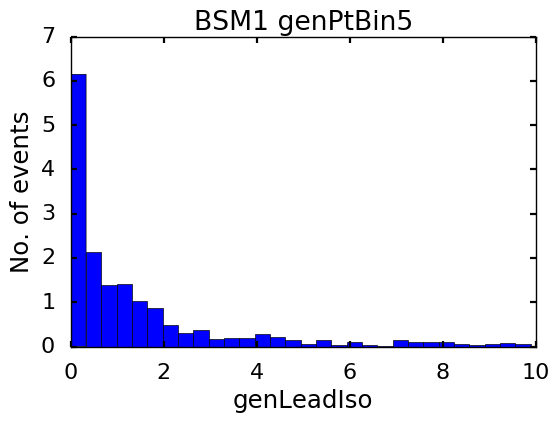

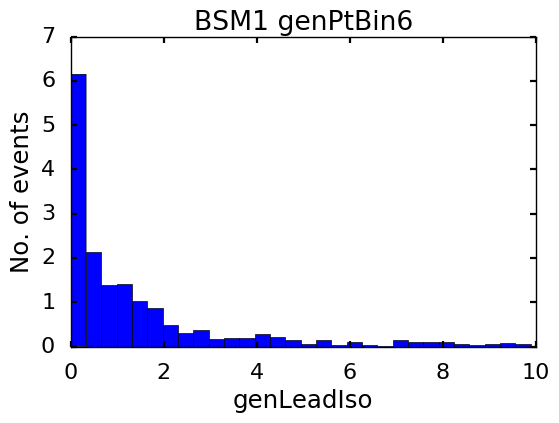

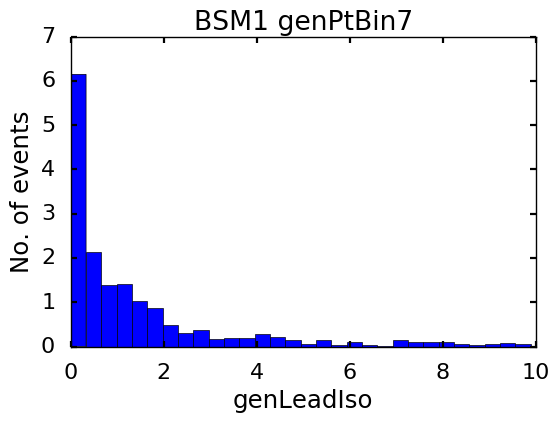

In [58]:
for genPtBIN in xrange(8) :
    plt.hist(genIso_BSM1['genLeadGenIso'],bins=30,weights=genIso_BSM1['weight'])
    plt.xlabel('genLeadIso')
    plt.ylabel('No. of events')
    plt.title('BSM1 genPtBin'+str(genPtBIN))
    plt.show()


#plt.hist(genSubIso_BSM1['genSubleadGenIso'],bins=50,
#         weights=genSubIso_BSM1['weight'])
#plt.show()


In [25]:
'reload(plotting)
for cl in class_list :
    for prod_mech in xrange(4,7,1) :
        
        plotting.draw_data_mc(df=df[df['proc']==prod_mech],
                               column = cl, 
                              logy=False, 
                              ratio=True,
                              var=[cl,''],
                              first=1,
                       savepath=save_directory,
                              title=cl+'_'+GetProdProcName(prod_mech),
                              absolute=False
                             )
        

SyntaxError: EOL while scanning string literal (<ipython-input-25-7a6e828a1efb>, line 1)

In [ ]:
len(FitterSM.df['class'])

In [ ]:
for s in list(set(df_SM.columns)-set(df_BSM1.columns)) :
    df_BSM1[s] = 0
    print s

In [ ]:
#df_BSM1[0:5].T

In [ ]:
df_BSM1[0:1]

In [ ]:
col = df_SM.columns

In [ ]:
print np.shape(df_BSM1)
print np.shape(df_SM)

In [ ]:
#df_all = pd.concat([df_SM,df_BSM1])
print col

In [ ]:
print df_BSM1['recoPtBin'][0:5]
print df_BSM1['recoPtCat'][0:5]


In [ ]:
print df_SM['recoPtBin'][0:5]
print df_SM['recoPtCat'][0:5]


In [ ]:
r1 = df_SM[0:2][[u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity',u'recoPtCat', u'class_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_prob_24']]
r2 = df_BSM1[0:1][[u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Pt4', u'genJet2p5Pt5',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoPt', u'recoRapidity', u'weight', u'proc',
       u'absGenRapidity',u'recoPtCat', u'class_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtCat_prob_6',
       u'recoPtCat_prob_7', u'recoPtCat_prob_8', u'recoPtCat_prob_9',
       u'recoPtCat_prob_10', u'recoPtCat_prob_11', u'recoPtCat_prob_12',
       u'recoPtCat_prob_13', u'recoPtCat_prob_14', u'recoPtCat_prob_15',
       u'recoPtCat_prob_16', u'recoPtCat_prob_17', u'recoPtCat_prob_18',
       u'recoPtCat_prob_19', u'recoPtCat_prob_20', u'recoPtCat_prob_21',
       u'recoPtCat_prob_22', u'recoPtCat_prob_23', u'recoPtCat_prob_24']]

In [ ]:
r1

In [ ]:
r2

In [ ]:
r1 = r1.append(r2,ignore_index=True)

In [ ]:
r1

In [ ]:
FitterSM.df = FitterSM.df.append(df_BSM1)

In [ ]:
print np.shape(df_BSM1)

In [ ]:
defineBins = { 'recoPt' : dict(boundaries=[0.,15.,30.,45.,85.,125.,200.,350.,10000.],overflow=False), # do not add overflow automatically
            #'recoNjets2p5' : dict(boundaries=[-0.5,0.5,1.5,2.5,3.5,100.],overflow=False)
              }
ut.runDefineBins(effFitter_BSM_1,defineBins)
df_BSM1 = effFitter_BSM_1.df
ut.runEvaluation(effFitter_BSM_1)

In [ ]:
print np.shape(df_BSM1)

In [ ]:
df_BSM1.columns